# 📊 Bank Marketing Campaign Analysis

## 🎯 Objective
Analyze a real-world bank marketing dataset to understand customer behavior and predict whether a client will subscribe to a term deposit.

---

## 📁 Dataset Info
- **File**: `bankmarketing.csv`
- **Source**: UCI Machine Learning Repository
- **Records**: 41,188 rows
- **Features**: Demographics, contact info, campaign data

---

## 🔍 Steps Performed
1. **Loaded and inspected the dataset**
2. **Checked missing values and data types**
3. **Explored summary statistics**
4. **Visualized target distribution (imbalanced)**
5. **Created a correlation heatmap for numerical features**
6. **Encoded categorical features using One-Hot Encoding**
7. **Converted target variable `y` to binary (`yes`=1, `no`=0)**
8. **Split dataset and trained Logistic Regression**
9. **Evaluated with accuracy, precision, recall, and confusion matrix**

---

## 📊 Model Results (Logistic Regression)
- **Accuracy**: `91.38%`
- **Precision (yes)**: `70%`
- **Recall (yes)**: `42%`
- **F1-score (yes)**: `52%`
- ✅ Majority class (`no`) is predicted well  
- ⚠️ Minority class (`yes`) has lower recall due to imbalance

---

## 📌 Key Insights
- The dataset is **highly imbalanced** toward customers not subscribing.
- Features like `duration`, `poutcome`, `previous` play an important role.
- Logistic Regression gives high accuracy but struggles with recall.
- 📈 Next steps: Try Random Forest or apply class balancing techniques like `class_weight='balanced'` or **SMOTE**.

---

## 💡 Tools & Libraries
- Python 🐍
- Pandas, Matplotlib, Seaborn
- Scikit-learn (Logistic Regression, metrics)

---

## 📁 Author
Prepared by: **Chilakala Meghana Ranga Laxmi**  
Project: Data Analytics Internship – Skillfied Mentor  


In [3]:
import pandas as pd
df=pd.read_csv("/content/bankmarketing.csv")
df.head()
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data types:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y               

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


/tmp/ipython-input-5-552700502.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='y', palette='pastel')


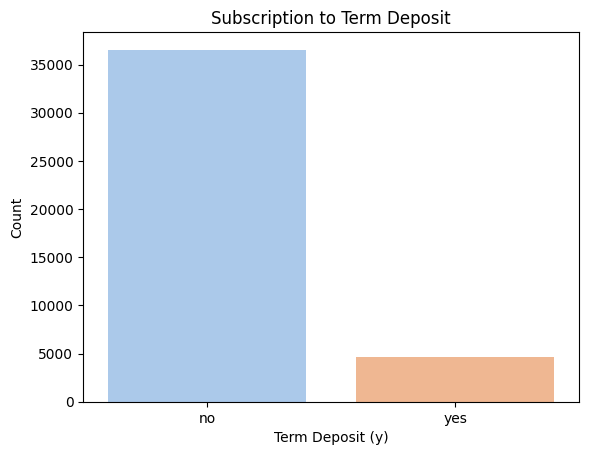

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable 'y'
sns.countplot(data=df, x='y', palette='pastel')
plt.title('Subscription to Term Deposit')
plt.xlabel('Term Deposit (y)')
plt.ylabel('Count')
plt.show()

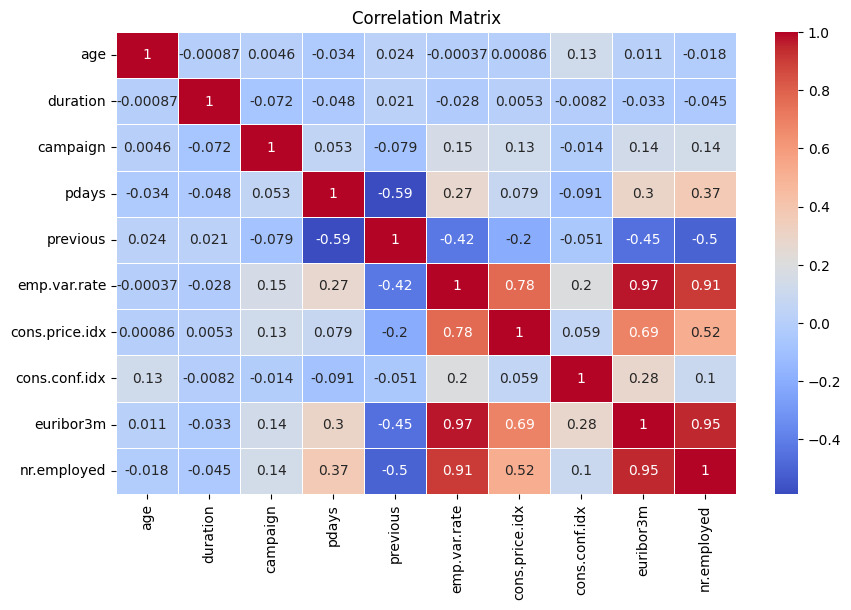

In [6]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Copy the original DataFrame to avoid modifying the original
df_clean = df.copy()

# Convert the target variable 'y' to numeric: 'yes' → 1, 'no' → 0
df_clean['y'] = df_clean['y'].map({'yes': 1, 'no': 0})

# Check unique values in object (categorical) columns
categorical_cols = df_clean.select_dtypes(include='object').columns
print("Categorical columns:", list(categorical_cols))


# Perform one-hot encoding on categorical features
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Show the new shape
print("Encoded DataFrame shape:", df_encoded.shape)

# Preview the final preprocessed dataset
df_encoded.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Split features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Initialize and train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Predictions and evaluation
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Encoded DataFrame shape: (41188, 54)
✅ Accuracy: 0.913814032532168

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.70      0.42      0.52       928

    accuracy                           0.91      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238


📊 Confusion Matrix:
 [[7140  170]
 [ 540  388]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


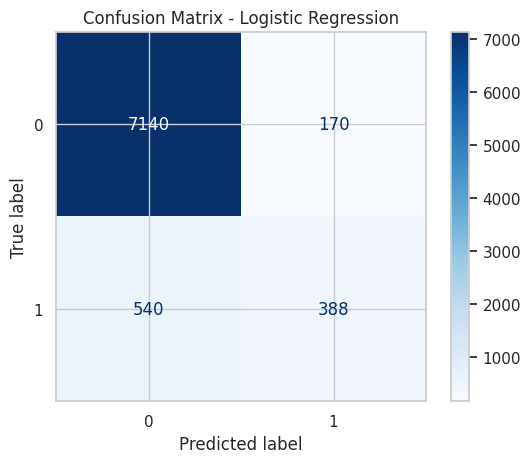

In [11]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot heatmap
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
